## Import Libraries and Load Data

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('credit_customers.csv')

##  Exploratory Data Analysis (EDA)
- Displayed the number of rows, columns, and data types.
- Show descriptive statistics (mean, min, max, std) for numerical features.
- **Visualization:**
  - Created a histogram of age to understand the age distribution of applicants.
  - Created a bar chart of purpose to show the most common loan purposes.

In [3]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         909 non-null    object
 1   duration                1000 non-null   int64 
 2   credit_history          961 non-null    object
 3   purpose                 957 non-null    object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          987 non-null    object
 6   employment              987 non-null    object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      942 non-null    object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 931 non-null    object
 15  exist

In [5]:
data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


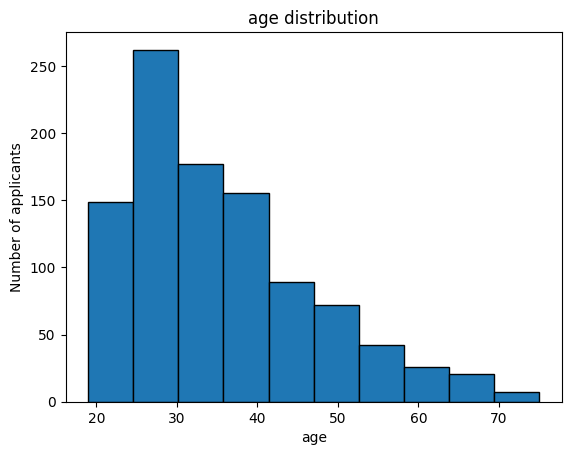

In [6]:
plt.hist(data['age'], edgecolor='black')
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('Number of applicants')
plt.show()

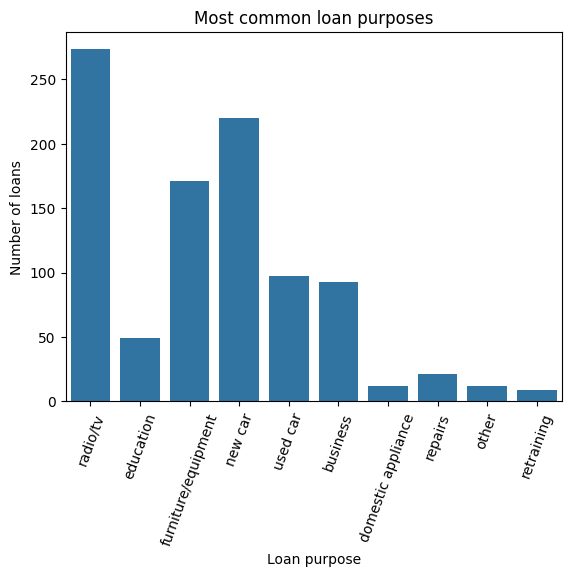

In [7]:
sns.countplot(data, x='purpose')
plt.title('Most common loan purposes')
plt.xlabel('Loan purpose')
plt.ylabel('Number of loans')
plt.xticks(rotation=70)
plt.show()

## Handling Missing Values

- Identified missing values in the dataset.
- applied an appropriate handling technique
- Explained why you chose this technique.
- **Visualization Task:** Before and after handling missing values, created a bar chart that shows the count of missing values per column.

In [8]:
data.isnull().sum()

checking_status           91
duration                   0
credit_history            39
purpose                   43
credit_amount              0
savings_status            13
employment                13
installment_commitment     0
personal_status            0
other_parties              0
residence_since            0
property_magnitude        58
age                        0
other_payment_plans        0
housing                   69
existing_credits           0
job                        0
num_dependents             0
own_telephone              0
foreign_worker             0
class                      0
dtype: int64

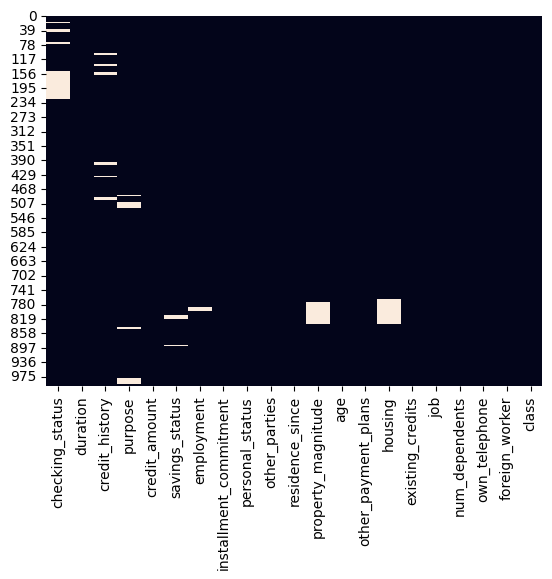

In [9]:
sns.heatmap(data.isnull(), cbar=False)
plt.show()

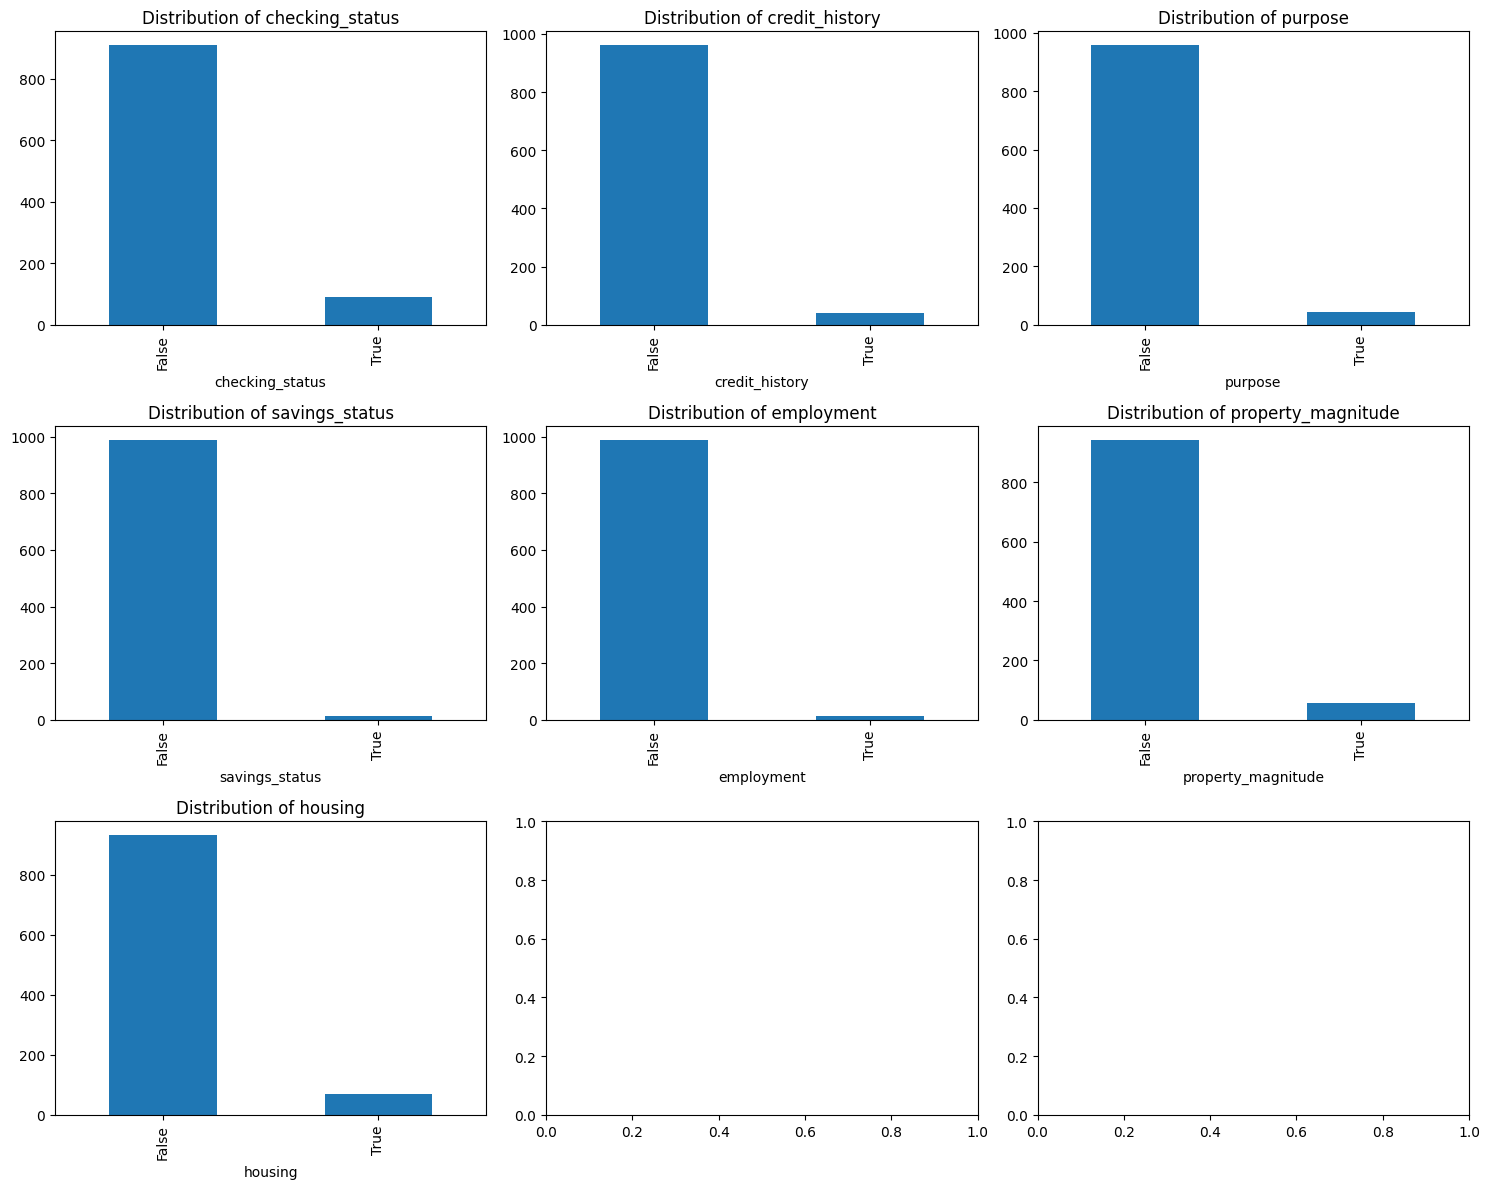

In [10]:
missing_cols = ['checking_status', 'credit_history', 'purpose', 'savings_status','employment','property_magnitude','housing']
fig, axs = plt.subplots(3, 3, figsize=(15, 12))

for i, col in enumerate(missing_cols):
    row = i // 3  
    col_idx = i % 3  
    ax = axs[row, col_idx]
    data[col].isnull().value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [11]:
data.fillna({'checking_status': 'no checking'}, inplace=True) # added 'no checking' to not be biased towards any category 

#filling 'credit_history' and 'purpose' with 'unknown' to avoid bias also
data['credit_history'] = data['credit_history'].fillna('unknown')
data['purpose'] = data['purpose'].fillna('unknown')

# filling it with the most common value because this is a not a very important financial background
data.fillna({'savings_status': data['savings_status'].mode()[0]}, inplace=True)
data.fillna({'employment': data['employment'].mode()[0]}, inplace=True)
data.fillna({'property_magnitude': data['property_magnitude'].mode()[0]}, inplace=True)
data.fillna({'housing': data['housing'].mode()[0]}, inplace=True)

In [12]:
data.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

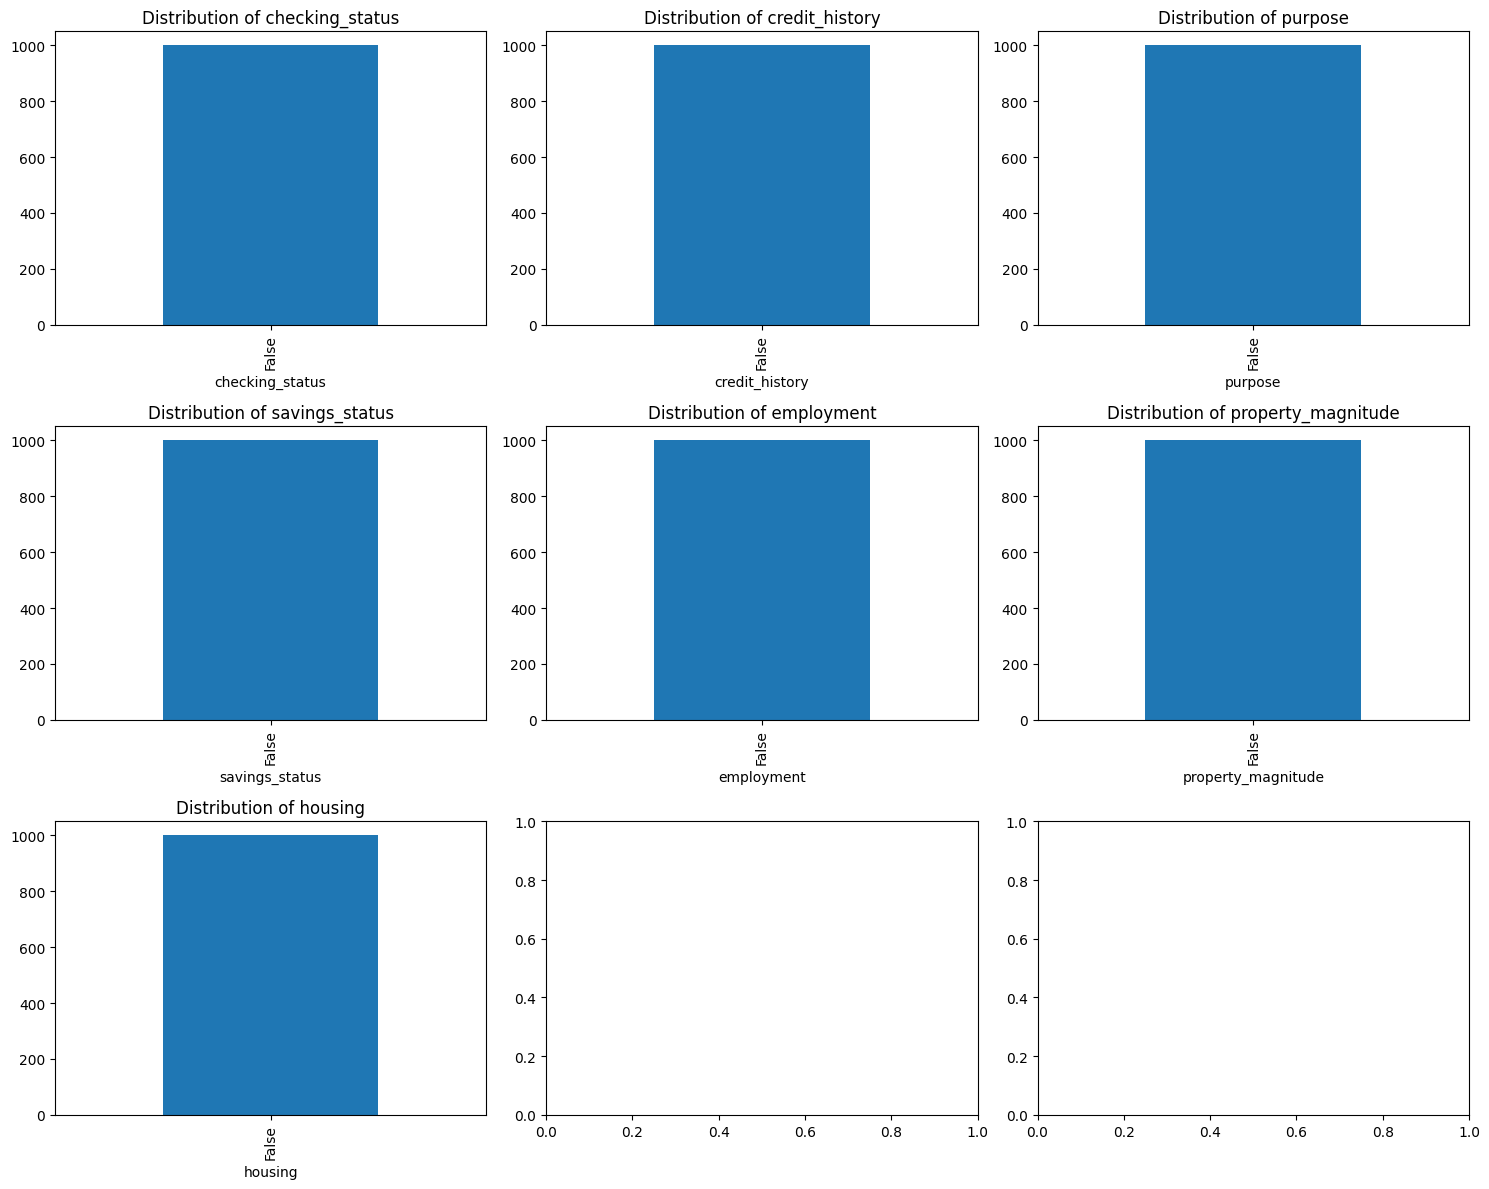

In [13]:
missing_cols = ['checking_status', 'credit_history', 'purpose', 'savings_status','employment','property_magnitude','housing']
fig, axs = plt.subplots(3, 3, figsize=(15, 12))

for i, col in enumerate(missing_cols):
    row = i // 3  
    col_idx = i % 3  
    ax = axs[row, col_idx]
    data[col].isnull().value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

## Handling Duplicated Data

- Checked if there are duplicated rows.
- **Visualization:** Showed before vs. after comparison of dataset size using a simple bar chart 

In [14]:
data.duplicated().sum()

np.int64(0)

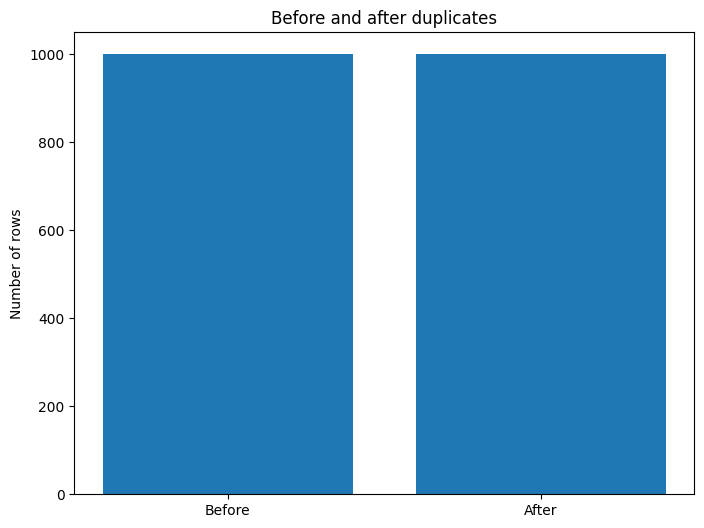

In [15]:
#no change
beforeD = data.shape[0]
data.drop_duplicates()
afterD = data.shape[0]
     
plt.figure(figsize=(8, 6))
plt.bar(['Before', 'After'], [beforeD, afterD])
plt.title('Before and after duplicates')
plt.ylabel('Number of rows')
plt.show()

##  Outlier Detection and Handling

- Detected the outliers in the numerical columns (e.g., credit_amount, age, duration) using a statistical method IQR 
- **Visualization  (Step 1):** Used boxplots to visualize outliers in  two numerical features.
- Handled the outliers 
- **Visualization  (Step 2):** Showd the boxplots again after handling outliers to compare the effect.


**note:** there is no need to remove the outliers,all of them can be acceptable 

In [16]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Box(y=data["credit_amount"],name ='Credit Amount'), row=1, col=1)

fig.add_trace(go.Box(y=data['duration'],name ='Duration'), row=1, col=2)

In [17]:
Q1 = data['credit_amount'].quantile(0.25)
Q3 = data['credit_amount'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliersM = ((data['credit_amount'] < lower) | (data['credit_amount'] > upper))

data = data[~outliersM]

In [18]:
Q1 = data['duration'].quantile(0.25)
Q3 = data['duration'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliersM2 = ((data['duration'] < lower) | (data['duration'] > upper))

data = data[~outliersM2]

In [19]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Box(y=data["credit_amount"],name ='Credit Amount'), row=1, col=1)

fig.add_trace(go.Box(y=data['duration'],name ='Duration'), row=1, col=2)

In [20]:
data.reset_index(drop=True, inplace=True)

##  Data Transformation
- Converted categorical variables into numerical format using one-hot encoding and label encoding.

In [21]:
print(data["checking_status"].unique())
print(data["credit_history"].unique())
print(data["savings_status"].unique())
print(data["employment"].unique())
print(data["housing"].unique())
print(data["job"].unique())

['<0' 'no checking' '0<=X<200' '>=200']
['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid' 'unknown']
['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']
['>=7' '4<=X<7' '1<=X<4' 'unemployed' '<1']
['own' 'for free' 'rent']
['skilled' 'unskilled resident' 'high qualif/self emp/mgmt'
 'unemp/unskilled non res']


In [22]:
cate_featuresORD = ['checking_status', 'credit_history', 'savings_status', 'employment', 'housing', 'job']

checking_status_order = ['<0', '0<=X<200', '>=200', 'no checking']
credit_history_order = ['unknown',"critical/other existing credit", "delayed previously", "existing paid",'all paid','no credits/all paid']
savings_status_order = ['no known savings','<100', '100<=X<500', '500<=X<1000', '>=1000']
employment_order = ['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7']
housing_order = ['for free','rent','own']
job_order = ['unemp/unskilled non res','unskilled resident', 'skilled', 'high qualif/self emp/mgmt']

encode = OrdinalEncoder(categories= [checking_status_order, credit_history_order, savings_status_order, employment_order, housing_order, job_order])
encoded_featuresORD = encode.fit_transform(data[cate_featuresORD])

In [23]:
dataORD = pd.DataFrame(encoded_featuresORD, columns= encode.get_feature_names_out())
pd.concat((dataORD, data[cate_featuresORD]), axis= 1).head()

,checking_status,credit_history,savings_status,employment,housing,job,checking_status,credit_history,savings_status,employment,housing,job
0,0.0,1.0,0.0,4.0,2.0,2.0,<0,critical/other existing credit,no known savings,>=7,own,skilled
1,3.0,1.0,1.0,3.0,2.0,1.0,no checking,critical/other existing credit,<100,4<=X<7,own,unskilled resident
2,0.0,3.0,1.0,3.0,0.0,2.0,<0,existing paid,<100,4<=X<7,for free,skilled
3,0.0,2.0,1.0,2.0,0.0,2.0,<0,delayed previously,<100,1<=X<4,for free,skilled
4,3.0,3.0,3.0,4.0,2.0,2.0,no checking,existing paid,500<=X<1000,>=7,own,skilled


In [24]:
data.drop(cate_featuresORD, axis=1, inplace=True)
data_encoded = pd.concat((data, dataORD), axis=1)
data_encoded.head()

,duration,purpose,credit_amount,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,...,num_dependents,own_telephone,foreign_worker,class,checking_status,credit_history,savings_status,employment,housing,job
0,6,radio/tv,1169,4,male single,none,4,real estate,67,none,...,1,yes,yes,good,0.0,1.0,0.0,4.0,2.0,2.0
1,12,education,2096,2,male single,none,3,real estate,49,none,...,2,none,yes,good,3.0,1.0,1.0,3.0,2.0,1.0
2,42,furniture/equipment,7882,2,male single,guarantor,4,life insurance,45,none,...,2,none,yes,good,0.0,3.0,1.0,3.0,0.0,2.0
3,24,new car,4870,3,male single,none,4,no known property,53,none,...,2,none,yes,bad,0.0,2.0,1.0,2.0,0.0,2.0
4,24,furniture/equipment,2835,3,male single,none,4,life insurance,53,none,...,1,none,yes,good,3.0,3.0,3.0,4.0,2.0,2.0


In [25]:
cate_featuresOHE = ['purpose', 'personal_status','other_parties', 'property_magnitude', 'other_payment_plans','own_telephone', 'foreign_worker']

encod = OneHotEncoder(sparse_output=False,drop='if_binary')
encoded_featuresOHE = encod.fit_transform(data[cate_featuresOHE])

In [26]:
dataOHE = pd.DataFrame(encoded_featuresOHE, columns= encod.get_feature_names_out())
pd.concat((dataOHE, data[cate_featuresOHE]), axis= 1).head(5)

,purpose_business,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_unknown,...,other_payment_plans_stores,own_telephone_yes,foreign_worker_yes,purpose,personal_status,other_parties,property_magnitude,other_payment_plans,own_telephone,foreign_worker
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,radio/tv,male single,none,real estate,none,yes,yes
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,education,male single,none,real estate,none,none,yes
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,furniture/equipment,male single,guarantor,life insurance,none,none,yes
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,new car,male single,none,no known property,none,none,yes
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,furniture/equipment,male single,none,life insurance,none,none,yes


In [27]:
data.drop(cate_featuresOHE, axis=1, inplace=True)
data_encoded = pd.concat((data, dataOHE), axis=1)
data_encoded.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class,purpose_business,purpose_domestic appliance,...,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,own_telephone_yes,foreign_worker_yes
0,6,1169,4,4,67,2,1,good,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
1,12,2096,2,3,49,1,2,good,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,42,7882,2,4,45,1,2,good,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,24,4870,3,4,53,2,2,bad,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,24,2835,3,4,53,1,1,good,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [28]:
label_encode = LabelEncoder()
data_encoded['class'] = label_encode.fit_transform(data_encoded['class'])
data_encoded.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class,purpose_business,purpose_domestic appliance,...,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,own_telephone_yes,foreign_worker_yes
0,6,1169,4,4,67,2,1,1,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
1,12,2096,2,3,49,1,2,1,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,42,7882,2,4,45,1,2,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,24,4870,3,4,53,2,2,0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,24,2835,3,4,53,1,1,1,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [29]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   duration                              884 non-null    int64  
 1   credit_amount                         884 non-null    int64  
 2   installment_commitment                884 non-null    int64  
 3   residence_since                       884 non-null    int64  
 4   age                                   884 non-null    int64  
 5   existing_credits                      884 non-null    int64  
 6   num_dependents                        884 non-null    int64  
 7   class                                 884 non-null    int64  
 8   purpose_business                      884 non-null    float64
 9   purpose_domestic appliance            884 non-null    float64
 10  purpose_education                     884 non-null    float64
 11  purpose_furniture/e

##  Class Imbalance

- Checked the balance between classes in the target variable (class).
- **Visualization:** Created a bar plot to show the distribution of "good" vs "bad" classes.
- applied a strategy to handle it.
- **Visualization  (after balancing):** Showed the updated class distribution with another bar plot.

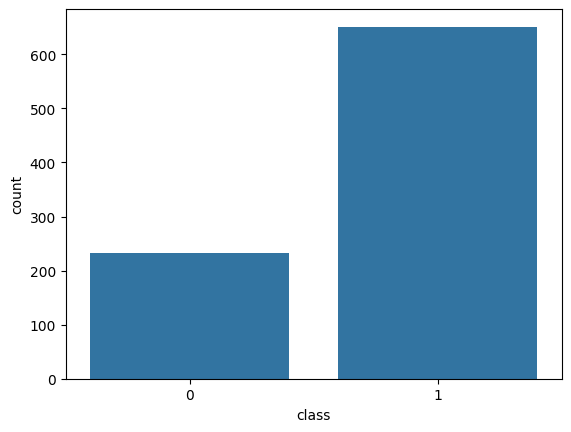

In [30]:
sns.countplot(x = 'class', data = data_encoded)
plt.show()

In [31]:
Features = data_encoded.drop("class", axis=1)
target = data_encoded["class"]

In [32]:
OS = SMOTE()
Features_rsbld, target_rsbld = OS.fit_resample(Features, target)

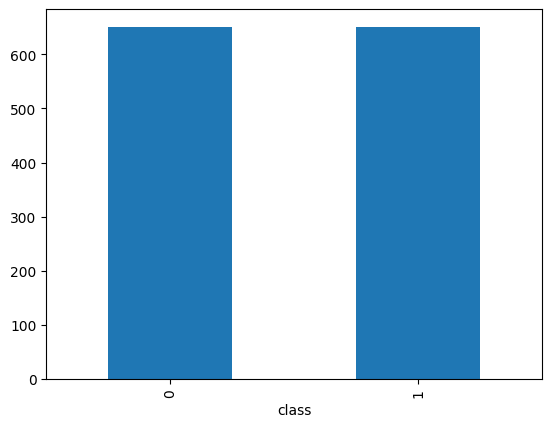

In [33]:
target_rsbld.value_counts().sort_index().plot(kind='bar')
plt.show()

## Splitting the Data

- Splitted the data into training and testing sets.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(Features_rsbld, target_rsbld, test_size=0.2, stratify=target_rsbld, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

(1041, 34)
(261, 34)
(1041,)
(261,)
class
1    0.50048
0    0.49952
Name: proportion, dtype: float64
class
0    0.501916
1    0.498084
Name: proportion, dtype: float64


## Scalling
- Applied feature scaling Min-Max scaling to numerical features.

In [40]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [41]:
data_encoded[['duration', 'credit_amount', 'age']].head()

,duration,credit_amount,age
0,6,1169,67
1,12,2096,49
2,42,7882,45
3,24,4870,53
4,24,2835,53


In [42]:
num_features = ['duration', 'credit_amount', 'age']
minmax_scaler = MinMaxScaler() 

X_train[num_features] = minmax_scaler.fit_transform(X_train[num_features])

X_test[num_features] = minmax_scaler.transform(X_test[num_features])


In [38]:
X_train[['duration', 'credit_amount', 'age']].head()

,duration,credit_amount,age
0,0.210526,0.184355,0.142857
1,0.842105,0.271619,0.089286
2,0.684211,0.947982,0.607143
3,0.210526,0.136137,0.035714
4,0.184211,0.148323,0.107143


In [39]:
final_data = pd.concat([X_train, y_train,X_test,y_test], axis=1)
final_data.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,purpose_business,purpose_domestic appliance,purpose_education,...,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,own_telephone_yes,foreign_worker_yes,class
0,0.210526,0.184355,2,2,0.142857,1,1,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.000000,0.0,1.0,0.0,0.0,1.0,1.0
1,0.842105,0.271619,4,4,0.089286,1,1,0.0,0.0,0.0,...,0.0,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0
2,0.684211,0.947982,4,1,0.607143,1,1,0.0,0.0,0.0,...,1.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,1.0
3,0.210526,0.136137,4,1,0.035714,1,1,0.0,0.0,0.0,...,0.0,0.0,0.880199,0.119801,0.0,1.0,0.0,0.0,1.0,0.0
4,0.184211,0.148323,2,2,0.107143,1,1,0.0,0.0,0.0,...,0.0,0.0,1.000000,0.000000,0.0,1.0,0.0,1.0,1.0,1.0
